# Explore the distibution of birth years

In [1]:
import sqlite3 as sql
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

## Get the birth dates (or years) from the SQLite database


In [2]:
### Define the path to the file (a string in a variable 'db_file')
db_file = '../data/peace_import_auto.db'

In [3]:
### Créer une connexion vers la base de données
# Attention: si la base de données n'existe pas, elle est créée à l'endroit indiqué.
# Ce qui est une manière de la créer si souhaité
try:
    cn = sql.connect(db_file)
except Exception as e:
    print(e)    
# Le contenu de la variable: connexion
# cn

In [11]:
### La requête à effectuer
# Préparée généralement directement sur la BD SQLite
# Elle produit la liste des années de naissance,
# une année par individu
q1 = """
SELECT birth_year 
FROM person p
order by birth_year 
"""

In [12]:
### Création du conteneur du résultat de la requête
try:
    cur = cn.cursor()
except Exception as e:
    print(e)    

In [13]:
### Exécuter la requête et récupérer le résultat
cur.execute(q1)
# La méthode 'fetchall' permet de récupérer toutes les lignes
r = cur.fetchall()
cn.close()

In [14]:
### Inspecter le résultat:
# longueur, type du résultat et premières lignes du résultat
# On observe qu'il y a des trous et des répétitions:
# plusieurs personnes on la même année de naissance
print(len(r), '\n-----\n', type(r),  '\n-----\n', r[:5])

369 
-----
 <class 'list'> 
-----
 [('1807',), ('1815',), ('1817',), ('1819',), ('1822',)]


## Python control structures

Read and treat each element (e) of a list 
* A [Python list](https://datacarpentry.github.io/python-socialsci/02-basics.html#the-list)
* [*for* loop](https://datacarpentry.github.io/python-socialsci/03-control-structures.html#the-for-loop) (Datacarpentry tutorial)
* [*while* loop](https://datacarpentry.github.io/python-socialsci/03-control-structures.html#the-while-loop)
* [*if* statement](https://datacarpentry.github.io/python-socialsci/03-control-structures.html#the-if-statement-and-variants)

In [15]:
### Result of SQL query: list of tuples
# five first elements
print(r[:5], '\n---')
# access the values
print(r[0], r[1], r[1][0])

[('1807',), ('1815',), ('1817',), ('1819',), ('1822',)] 
---
('1807',) ('1815',) 1815


In [16]:
# 'for' loop on the first five elements
for e in r[:5]:
    print(e[0])

1807
1815
1817
1819
1822


In [17]:
# 'while' loop on the first five elements
i = 0
while i < 5 :
    print(r[i][0])
    i += 1

1807
1815
1817
1819
1822


In [19]:
# 'while' loop on the first 20 elements
# adding an if condition
i = 0
while i < 20:
    try:
        valeur = int(r[i][0])  
        if valeur % 5 == 0:
            print(valeur)
    except ValueError:
        print(f"Erreur de conversion pour r[{i}][0]: {r[i][0]}")
    
    i += 1 



1815
1835
1835
1840
1850
1850


## Prepare the data to be plotted

In [20]:
### Create a new list of values, not tuples
# create an empty list named 'lr'
lr = []

# add (append) each element (the first part of it) to the list 'lr'.
for e in r:
    lr.append(e[0])

print(lr[:5])

['1807', '1815', '1817', '1819', '1822']


In [21]:
### Test if all list elements are of type 'integer'
# Doc.: https://stackoverflow.com/questions/6009589/how-to-test-if-every-item-in-a-list-of-type-int
all(type(item) is int for item in lr)

False

In [22]:
### Extract the year from the date and convert value from string to integer
dt = '1457-08-02'
a = int(dt[:4]) ; a

1457

In [23]:
### Apply to the whole list:
# first, convert all values to string
# second, take only the first four characteurs, i.e. the year
# then convert to integer
lr = []
for e in r:
    lr.append(int((str(e[0]))[:4]))


print(lr[:5])    

[1807, 1815, 1817, 1819, 1822]


In [24]:
### Create a Pandas series (a particular list object)
slr = pd.Series(lr, name='Année')
print(slr[:2])

0    1807
1    1815
Name: Année, dtype: int64


In [25]:
slrg = slr.groupby(by=slr).size()
slrg.name='Année'
slrg.tail()

Année
1986    1
1987    1
1988    1
1989    1
1997    2
Name: Année, dtype: int64

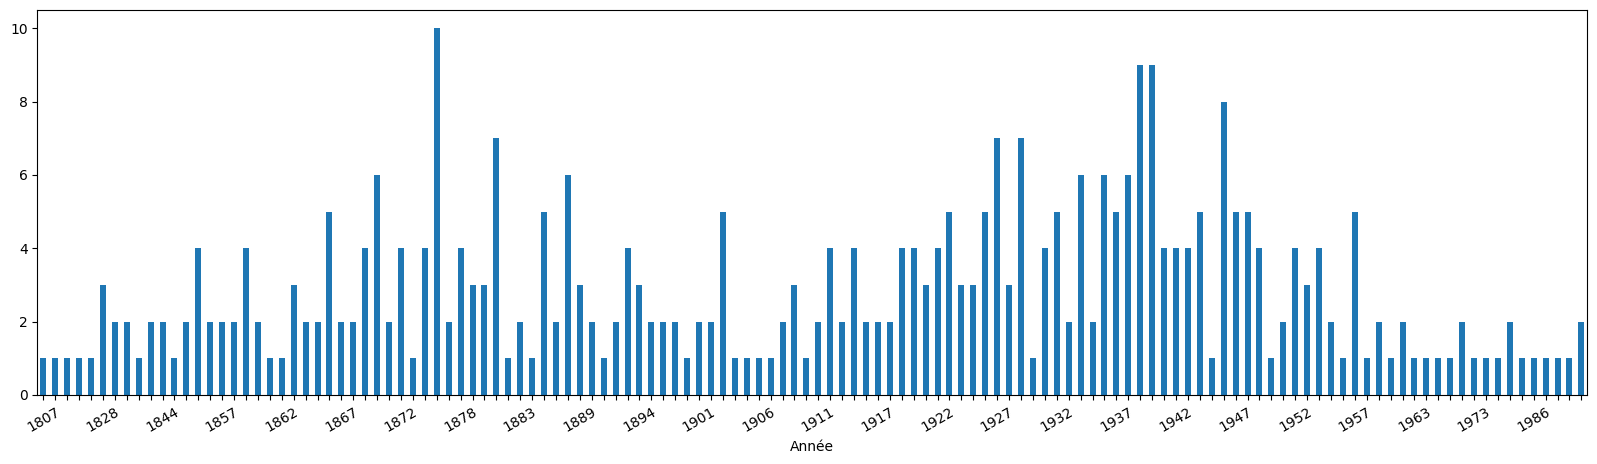

In [26]:
### Group by year and plot
# Beware : a lot of years are missing !
# Avoid this approach !

fig, ax = plt.subplots()



slrg.plot(kind='bar', figsize=(20, 5))

## specific xticks labels customisation
every_nth = 5
for n, label in enumerate(ax.xaxis.get_ticklabels()):
    if n % every_nth != 0:
        label.set_visible(False)
plt.xticks(rotation=30)        
plt.show()

In [27]:

print (lr[:3], lr[-7:], 'Min: ' + str(min(lr)), 'Max: ' + str(max(lr)))


[1807, 1815, 1817] [1982, 1986, 1987, 1988, 1989, 1997, 1997] Min: 1807 Max: 1997


In [28]:
y_l = list(range(min(lr), max(lr) + 1, 1))
print(len(y_l),y_l[:7])

191 [1807, 1808, 1809, 1810, 1811, 1812, 1813]


In [30]:
### Count how many births there are per year
# Parse a list inside another list: can be slow for long lists !
# There are other methods, here we just want to illustrate the idea
y_r = []
for a in y_l:
    # initialize the counter for each year
    n = 0    
    for v in lr:        
        if v == a:
            n += 1
        else:
            pass    
    y_r.append([a,n])
print(y_r[:10])  

[[1807, 1], [1808, 0], [1809, 0], [1810, 0], [1811, 0], [1812, 0], [1813, 0], [1814, 0], [1815, 1], [1816, 0]]


In [31]:
### Create a Pandas dataframe (a kind of SQL table)
df_y_r = pd.DataFrame(y_r, columns=['year', 'number'])
df_y_r.tail(10)

,year,number
181,1988,1
182,1989,1
183,1990,0
184,1991,0
185,1992,0
186,1993,0
187,1994,0
188,1995,0
189,1996,0
190,1997,2


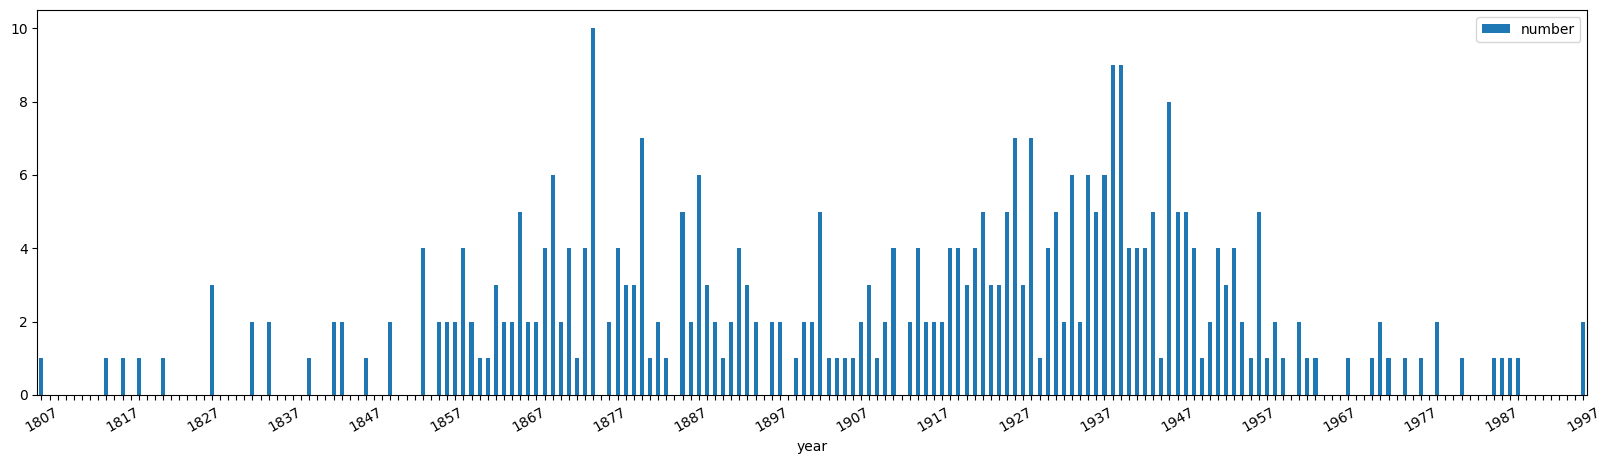

In [32]:
### Group by year and plot


fig, ax = plt.subplots()

df_y_r.plot(x='year', y='number',kind='bar', figsize=(20, 5), ax=ax)

## specific xticks labels customisation
every_nth = 10
for n, label in enumerate(ax.xaxis.get_ticklabels()):
    if n % every_nth != 0:
        label.set_visible(False)
ax.tick_params(axis='x', labelsize=10,  rotation=30)
plt.show()

## Plot with the Plotly library

In [33]:
# The original series
print(slrg.head(), slrg.tail())

Année
1807    1
1815    1
1817    1
1819    1
1822    1
Name: Année, dtype: int64 Année
1986    1
1987    1
1988    1
1989    1
1997    2
Name: Année, dtype: int64


In [34]:
### Use a different plotting library: Plotly Express
# Observe the default behaviour of the library

fig = px.bar(slrg)
fig.update_traces(width=2)
fig.show()

### Codage par période de vingt-cinq ans

In [35]:
type(slrg), slrg.tail()

(pandas.core.series.Series,
 Année
 1986    1
 1987    1
 1988    1
 1989    1
 1997    2
 Name: Année, dtype: int64)

In [36]:
df_slrg = slrg.reset_index(name='Effectif')
df_slrg.tail(10)

,Année,Effectif
120,1973,1
121,1975,1
122,1977,1
123,1979,2
124,1982,1
125,1986,1
126,1987,1
127,1988,1
128,1989,1
129,1997,2


In [37]:
### Créer une liste d'années pour séparer en périodes de 25 ans
# noter que la dernière année sera exclue, 
# elle donc doit être supérieure à la valeur maximale 
l_10 = list(range(1800, 2002, 10))
print(l_10[:5],l_10[-5:])

[1800, 1810, 1820, 1830, 1840] [1960, 1970, 1980, 1990, 2000]


In [38]:
### fonction pd.cut : https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.cut.html
# On ajoute une nouvelle colonne qui contient la période sur la base de la liste précédente
# et de la valeur de l'année

df_slrg['Périodes'] = pd.cut(df_slrg.Année, l_10, right=False)

### Transformer le code ajouté pour qu'il soit plus lisible
# noter qu'on a arrondi les valeurs
df_slrg['Périodes'] = df_slrg['Périodes'].apply(lambda x : str(int(x.left))+'-'+ str(int(x.right)-1))

# Inspection
df_slrg.head(3)

,Année,Effectif,Périodes
0,1807,1,1800-1809
1,1815,1,1810-1819
2,1817,1,1810-1819


In [39]:
### compter les naissances par périodes de 25 ans
df_slrg[['Périodes','Effectif']].groupby(by='Périodes').sum().head()

,Effectif
Périodes,
1800-1809,1
1810-1819,3
1820-1829,4
1830-1839,4
1840-1849,6


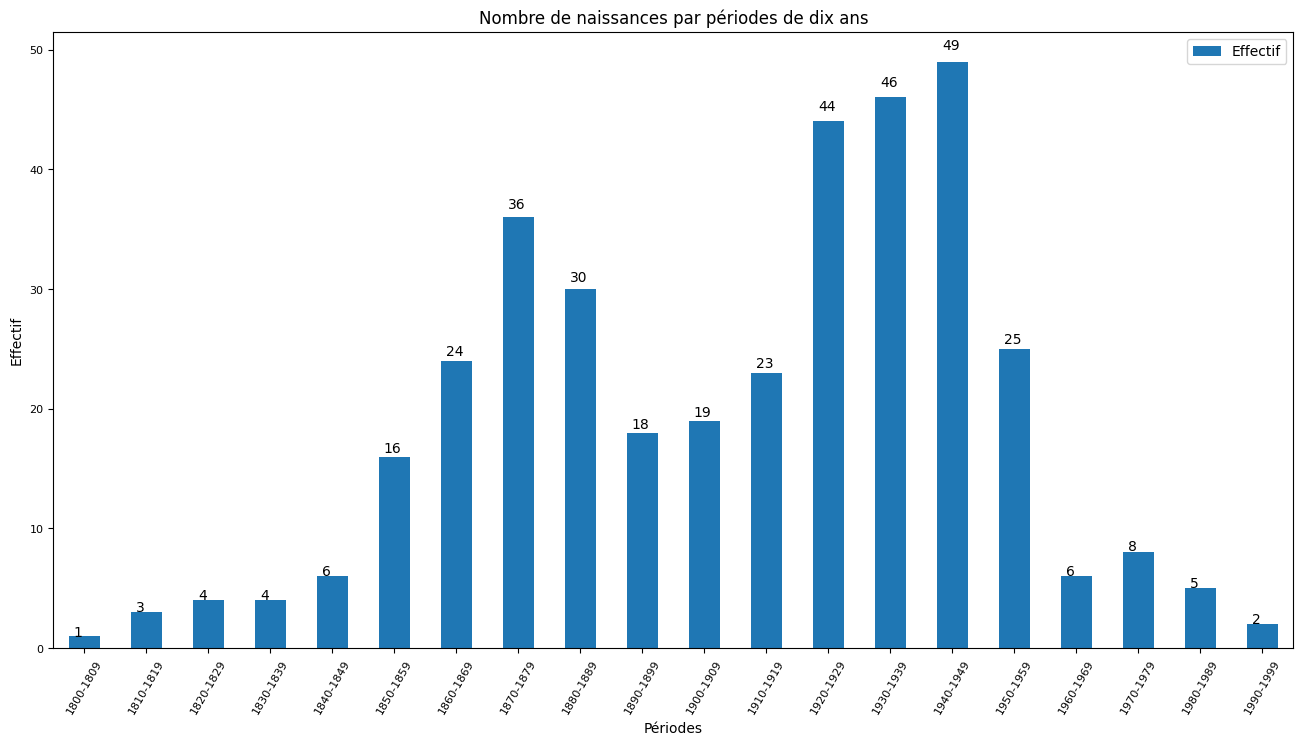

In [40]:
g_df = df_slrg[['Périodes','Effectif']].groupby(by='Périodes').sum()

ax = g_df.plot(kind='bar',rot=60, fontsize=8, figsize=(16,8))
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + 0.08 , p.get_height() * 1.02))
plt.ylabel('Effectif')
plt.xlabel('Périodes')
plt.title('Nombre de naissances par périodes de dix ans')
plt.savefig('pictures/birth_years_plt_20241216.png')
plt.show()